# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This time, I analyzed using the dataset of The Movie Database (TMDb). This dataset contained multiple types such as number and object, so I converted the types. Some data had missing values, so I deleted unnecessary data. Using this dataset, I conducted an analysis to answer the questions listed below.

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.  
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the ‘cast’ column. 
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. 


### Question(s) for Analysis
- What is the highest revenue movie?
- Which genre is the most in the top 100 movie ranking with high revenue?
- What kinds of properties are associated with movies that have high revenues?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.


### General Properties

In [2]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09


### Data Cleaning

In [7]:
# Only the columns necessary to answer the questions have been excerpted.
columns = ['original_title', 'popularity', 'director', 'runtime', 'genres', 'vote_count',
           'vote_average', 'release_year', 'budget_adj', 'revenue_adj']

In [8]:
# Check point
df2 = df[columns]
df2.head(1)

original_title  popularity         director  runtime  \
0  Jurassic World   32.985763  Colin Trevorrow      124   

                                      genres  vote_count  vote_average  \
0  Action|Adventure|Science Fiction|Thriller        5562           6.5   

   release_year    budget_adj   revenue_adj  
0          2015  1.379999e+08  1.392446e+09

In [9]:
# Rename columns
df2 = df2.rename(columns={'budget_adj': 'budget', 'revenue_adj': 'revenue'})
df2.head(1)

original_title  popularity         director  runtime  \
0  Jurassic World   32.985763  Colin Trevorrow      124   

                                      genres  vote_count  vote_average  \
0  Action|Adventure|Science Fiction|Thriller        5562           6.5   

   release_year        budget       revenue  
0          2015  1.379999e+08  1.392446e+09

In [10]:
df2.isnull().sum()

original_title     0
popularity         0
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget             0
revenue            0
dtype: int64

In [11]:
df2 = df2.dropna()
df2.isnull().sum()

original_title    0
popularity        0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget            0
revenue           0
dtype: int64

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10801 non-null  object 
 1   popularity      10801 non-null  float64
 2   director        10801 non-null  object 
 3   runtime         10801 non-null  int64  
 4   genres          10801 non-null  object 
 5   vote_count      10801 non-null  int64  
 6   vote_average    10801 non-null  float64
 7   release_year    10801 non-null  int64  
 8   budget          10801 non-null  float64
 9   revenue         10801 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 928.2+ KB


In [13]:
# change type
df2['budget'] = df2['budget'].astype('int64')
df2['revenue'] = df2['revenue'].astype('int64')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10801 non-null  object 
 1   popularity      10801 non-null  float64
 2   director        10801 non-null  object 
 3   runtime         10801 non-null  int64  
 4   genres          10801 non-null  object 
 5   vote_count      10801 non-null  int64  
 6   vote_average    10801 non-null  float64
 7   release_year    10801 non-null  int64  
 8   budget          10801 non-null  int64  
 9   revenue         10801 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 928.2+ KB


In [14]:
df2.head(1)

original_title  popularity         director  runtime  \
0  Jurassic World   32.985763  Colin Trevorrow      124   

                                      genres  vote_count  vote_average  \
0  Action|Adventure|Science Fiction|Thriller        5562           6.5   

   release_year     budget     revenue  
0          2015  137999939  1392445892

In [15]:
# Check duplicated movies
print(df2.duplicated().sum())

1


In [16]:
# Find duplicated movie
df2[df2.duplicated()]

original_title  popularity          director  runtime  \
2090         TEKKEN     0.59643  Dwight H. Little       92   

                                           genres  vote_count  vote_average  \
2090  Crime|Drama|Action|Thriller|Science Fiction         110           5.0   

      release_year    budget  revenue  
2090          2010  30000000   967000

In [17]:
df2 = df2.drop_duplicates()
print(df2.duplicated().sum())

0


In [18]:
df2.describe()

popularity       runtime    vote_count  vote_average  release_year  \
count  10800.000000  10800.000000  10800.000000  10800.000000  10800.000000   
mean       0.649455    102.189722    218.600741      5.970880   2001.289537   
std        1.002441     30.783873    577.165055      0.933006     12.819545   
min        0.000188      0.000000     10.000000      1.500000   1960.000000   
25%        0.209156     90.000000     17.000000      5.400000   1995.000000   
50%        0.385471     99.000000     39.000000      6.000000   2006.000000   
75%        0.717508    111.250000    147.000000      6.600000   2011.000000   
max       32.985763    900.000000   9767.000000      9.200000   2015.000000   

             budget       revenue  
count  1.080000e+04  1.080000e+04  
mean   1.765437e+07  5.167714e+07  
std    3.438403e+07  1.450182e+08  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    2.103337e+07  3.408743e+07  
max    4.250000e+08  2.827124e+09

In [19]:
# Check budget=0 and revenue=0
print('budget=0:', sum(df2['budget'] == 0))
print('revenue=0:', sum(df2['revenue'] == 0))

budget=0: 5638
revenue=0: 5952


In [20]:
# Check Point
# Drop budget=0 and revenue=0
df3 = df2[~(df2['budget']==0)]
df3 = df3[~(df3['revenue']==0)]
print('budget=0:', sum(df3['budget'] == 0))
print('revenue=0:', sum(df3['revenue'] == 0))

budget=0: 0
revenue=0: 0


In [21]:
df3.describe()

popularity      runtime   vote_count  vote_average  release_year  \
count  3852.000000  3852.000000  3852.000000   3852.000000    3852.00000   
mean      1.191999   109.213915   527.977155      6.168484    2001.25675   
std       1.475410    19.913092   880.112904      0.794981      11.28389   
min       0.001117    15.000000    10.000000      2.200000    1960.00000   
25%       0.462529    95.000000    71.000000      5.700000    1995.00000   
50%       0.797913   106.000000   204.000000      6.200000    2004.00000   
75%       1.369877   119.000000   580.250000      6.700000    2010.00000   
max      32.985763   338.000000  9767.000000      8.400000    2015.00000   

             budget       revenue  
count  3.852000e+03  3.852000e+03  
mean   4.426186e+07  1.371330e+08  
std    4.481058e+07  2.161466e+08  
min    1.000000e+00  2.000000e+00  
25%    1.309053e+07  1.840847e+07  
50%    3.002841e+07  6.175513e+07  
75%    6.065160e+07  1.633093e+08  
max    4.250000e+08  2.827124e+09

<a id='eda'></a>
## Exploratory Data Analysis
I'm going to do some analysis to answer the questions and find the answers.

### Research Question 1 (What is the highest revenue movie?)

In [22]:
df_high = df3.sort_values('revenue', ascending=False).head(1)
df_high

original_title  popularity       director  runtime  \
1386         Avatar    9.432768  James Cameron      162   

                                        genres  vote_count  vote_average  \
1386  Action|Adventure|Fantasy|Science Fiction        8458           7.1   

      release_year     budget     revenue  
1386          2009  240886902  2827123750

### Answer 1
Avatar

### Research Question 2  (Which genre is the most in the top 100 movie ranking with high revenue?)

In [23]:
# Create hight revenue top 100 dataframe
df_top100 = df3.sort_values('revenue', ascending=False, ignore_index=True).head(100)
df_top100.head(3)

original_title  popularity       director  runtime  \
0         Avatar    9.432768  James Cameron      162   
1      Star Wars   12.037933   George Lucas      121   
2        Titanic    4.355219  James Cameron      194   

                                     genres  vote_count  vote_average  \
0  Action|Adventure|Fantasy|Science Fiction        8458           7.1   
1          Adventure|Action|Science Fiction        4428           7.9   
2                    Drama|Romance|Thriller        4654           7.3   

   release_year     budget     revenue  
0          2009  240886902  2827123750  
1          1977   39575591  2789712242  
2          1997  271692064  2506405735

In [24]:
# Split genres and create genres dataframe
df_genres = pd.DataFrame(df_top100['genres'].str.split('|').explode())
df_genres

genres
0            Action
0         Adventure
0           Fantasy
0   Science Fiction
1         Adventure
..              ...
98           Action
99        Adventure
99          Fantasy
99            Drama
99          Romance

[321 rows x 1 columns]

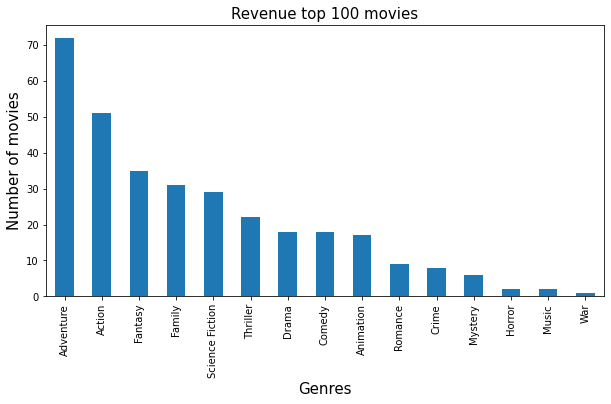

In [25]:
df_genres['genres'].value_counts().plot(kind='bar', figsize=(10, 5));
plt.xlabel("Genres", fontsize=15);
plt.ylabel("Number of movies", fontsize=15);
plt.title("Revenue top 100 movies", fontsize=15);

### Answer 2
Adventure

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

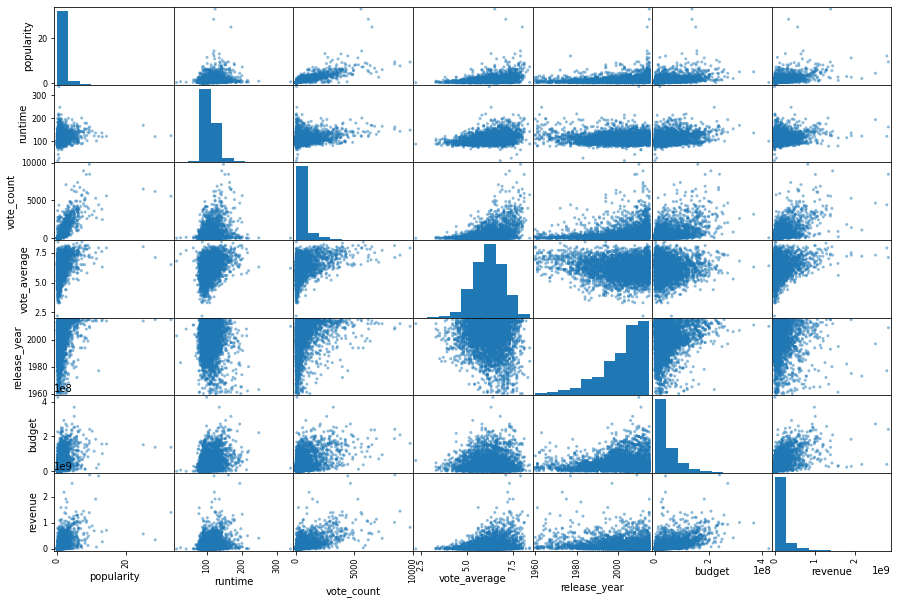

In [26]:
# See the relationship of each element
pd.plotting.scatter_matrix(df3, figsize=(15, 10));

I think budget and vote_count are related to revenue. Obtain the correlation coefficient to see more accurately.

In [27]:
# Check correlation coefficient
corr = df3.corr()
corr

/var/folders/h8/6j9fnlsn7bq6gh649_gcjkc80000gn/T/ipykernel_59258/674820447.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df3.corr()


popularity   runtime  vote_count  vote_average  release_year  \
popularity      1.000000  0.215563    0.780060      0.317739      0.173530   
runtime         0.215563  1.000000    0.274199      0.352030     -0.112678   
vote_count      0.780060  0.274199    1.000000      0.387090      0.207449   
vote_average    0.317739  0.352030    0.387090      1.000000     -0.133973   
release_year    0.173530 -0.112678    0.207449     -0.133973      1.000000   
budget          0.399204  0.334565    0.497852      0.036430      0.075491   
revenue         0.546880  0.280915    0.654628      0.266669     -0.102939   

                budget   revenue  
popularity    0.399204  0.546880  
runtime       0.334565  0.280915  
vote_count    0.497852  0.654628  
vote_average  0.036430  0.266669  
release_year  0.075491 -0.102939  
budget        1.000000  0.570339  
revenue       0.570339  1.000000

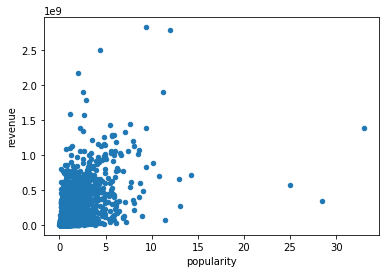

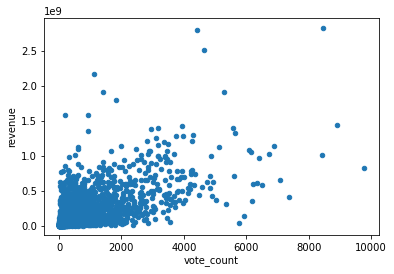

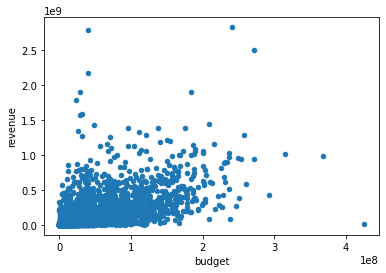

In [28]:
df3.plot(x='popularity', y='revenue', kind='scatter');
df3.plot(x='vote_count', y='revenue', kind='scatter');
df3.plot(x='budget', y='revenue', kind='scatter');

### Answer 3
I think popularity, vote_count, and budget are related to revenue.

### Ranking (Not related to data analysis)

In [29]:
# Vote count top20
df_vt = df3.sort_values('vote_count', ascending=False, ignore_index=True)
df_vt.head(20)

original_title  popularity  \
0                                           Inception    9.363643   
1                                        The Avengers    7.637767   
2                                              Avatar    9.432768   
3                                     The Dark Knight    8.466668   
4                                    Django Unchained    5.944518   
5                                    The Hunger Games    2.571099   
6                                          Iron Man 3    4.946136   
7                               The Dark Knight Rises    6.591277   
8                                        Interstellar   24.949134   
9                   The Hobbit: An Unexpected Journey    4.218933   
10                                         The Matrix    7.753899   
11                                           Iron Man    4.977955   
12                                 Mad Max: Fury Road   28.419936   
13                                            Skyfall    5.603587   
14  The Lord of the Rings: The Fellowship of the Ring    8.575419   
15                                         Fight Club    8.947905   
16                           The Shawshank Redemption    7.192039   
17      The Lord of the Rings: The Return of the King    7.122455   
18                            Guardians of the Galaxy   14.311205   
19                                     Jurassic World   32.985763   

                          director  runtime  \
0                Christopher Nolan      148   
1                      Joss Whedon      143   
2                    James Cameron      162   
3                Christopher Nolan      152   
4                Quentin Tarantino      165   
5                        Gary Ross      142   
6                      Shane Black      130   
7                Christopher Nolan      165   
8                Christopher Nolan      169   
9                    Peter Jackson      169   
10  Lilly Wachowski|Lana Wachowski      136   
11                     Jon Favreau      126   
12                   George Miller      120   
13                      Sam Mendes      143   
14                   Peter Jackson      178   
15                   David Fincher      139   
16                  Frank Darabont      142   
17                   Peter Jackson      201   
18                      James Gunn      121   
19                 Colin Trevorrow      124   

                                               genres  vote_count  \
0   Action|Thriller|Science Fiction|Mystery|Adventure        9767   
1                    Science Fiction|Action|Adventure        8903   
2            Action|Adventure|Fantasy|Science Fiction        8458   
3                         Drama|Action|Crime|Thriller        8432   
4                                       Drama|Western        7375   
5                   Science Fiction|Adventure|Fantasy        7080   
6                    Action|Adventure|Science Fiction        6882   
7                         Action|Crime|Drama|Thriller        6723   
8                     Adventure|Drama|Science Fiction        6498   
9                            Adventure|Fantasy|Action        6417   
10                             Action|Science Fiction        6351   
11                   Action|Science Fiction|Adventure        6220   
12          Action|Adventure|Science Fiction|Thriller        6185   
13                          Action|Adventure|Thriller        6137   
14                           Adventure|Fantasy|Action        6079   
15                                              Drama        5923   
16                                        Drama|Crime        5754   
17                           Adventure|Fantasy|Action        5636   
18                   Action|Science Fiction|Adventure        5612   
19          Action|Adventure|Science Fiction|Thriller        5562   

    vote_average  release_year     budget     revenue  
0            7.9          2010  160000000   825500000  
1            7.3          2012  2089437

In [30]:
# Vote average
df_vt_av = df3.sort_values('vote_average', ascending=False, ignore_index=True)
df_vt_av.head(20)

original_title  popularity              director  \
0                 Stop Making Sense    0.283191        Jonathan Demme   
1          The Shawshank Redemption    7.192039        Frank Darabont   
2                     The Godfather    5.738034  Francis Ford Coppola   
3                          Whiplash    4.780419       Damien Chazelle   
4            The Godfather: Part II    3.264571  Francis Ford Coppola   
5                        Fight Club    8.947905         David Fincher   
6                   The Dark Knight    8.466668     Christopher Nolan   
7                  Schindler's List    2.377288      Steven Spielberg   
8                      Pulp Fiction    8.093754     Quentin Tarantino   
9                      Forrest Gump    6.715966       Robert Zemeckis   
10                       Inside Out    6.326804           Pete Docter   
11  One Flew Over the Cuckoo's Nest    3.258151         MiloÅ¡ Forman   
12               The Imitation Game    8.110711         Morten Tyldum   
13                     Interstellar   24.949134     Christopher Nolan   
14                             Room    3.557846      Lenny Abrahamson   
15                           Psycho    2.610362      Alfred Hitchcock   
16                   The Green Mile    2.719461        Frank Darabont   
17               American History X    1.333006             Tony Kaye   
18          The Empire Strikes Back    5.488441        Irvin Kershner   
19               The Usual Suspects    3.440238          Bryan Singer   

    runtime                            genres  vote_count  vote_average  \
0        88                 Documentary|Music          23           8.4   
1       142                       Drama|Crime        5754           8.4   
2       175                       Drama|Crime        3970           8.3   
3       105                       Drama|Music        2372           8.2   
4       200                       Drama|Crime        2131           8.1   
5       139                             Drama        5923           8.1   
6       152       Drama|Action|Crime|Thriller        8432           8.1   
7       195                 Drama|History|War        2632           8.1   
8       154                    Thriller|Crime        5343           8.1   
9       142              Comedy|Drama|Romance        4856           8.1   
10       94           Comedy|Animation|Family        3935           8.0   
11      133                             Drama        1612           8.0   
12      113        History|Drama|Thriller|War        3478           8.0   
13      169   Adventure|Drama|Science Fiction        6498           8.0   
14      117                    Drama|Thriller        1520           8.0   
15      109             Drama|Horror|Thriller        1180           8.0   
16      189               Fantasy|Drama|Crime        2299           8.0   
17      119                             Drama        1563           8.0   
18      124  Adventure|Action|Science Fiction        3954           8.0   
19      106              Drama|Crime|Thriller        1942           8.0   

    release_year     budget     revenue  
0           1984    2518850    10450966  
1           1994   36777789    41693462  
2           1972   31287365  1277913732  
3           2014    3039600    12888912  
4           1974   57489690   210247939  
5           1999   82470329   132022892  
6           2008  187365527  1014733032  
7           1993   33208339   484941026  
8           1994   11768892   314713075  
9           1994   80911135   997333314  
10          2015  160999929   785411574  
11          1975   12155463   441572637  
12          2014   12895274   215126072  
13          2014  151980023   572690645  
14          2015    5519997    32569603  
15          1960    5949601   235934958  
16          1999   78543170   372556440  
17          1998   26753909    31937649  
18          1980   47628661  1424626187  
19          1995    8585801    33401010

In [31]:
# Revenue top20
df_re = df3.sort_values('revenue', ascending=False, ignore_index=True)
df_re.head(20)

original_title  popularity  \
0                                          Avatar    9.432768   
1                                       Star Wars   12.037933   
2                                         Titanic    4.355219   
3                                    The Exorcist    2.010733   
4                                            Jaws    2.563191   
5                    Star Wars: The Force Awakens   11.173104   
6                      E.T. the Extra-Terrestrial    2.900556   
7                                         The Net    1.136610   
8                  One Hundred and One Dalmatians    2.631987   
9                                    The Avengers    7.637767   
10                        The Empire Strikes Back    5.488441   
11                                 Jurassic World   32.985763   
12                                  Jurassic Park    2.204926   
13                                      Furious 7    9.335014   
14                                The Jungle Book    2.550704   
15  The Lord of the Rings: The Return of the King    7.122455   
16                        Avengers: Age of Ultron    5.944927   
17   Harry Potter and the Deathly Hallows: Part 2    5.711315   
18                                  The Godfather    5.738034   
19                             Return of the Jedi    4.828854   

                                             director  runtime  \
0                                       James Cameron      162   
1                                        George Lucas      121   
2                                       James Cameron      194   
3                                    William Friedkin      122   
4                                    Steven Spielberg      124   
5                                         J.J. Abrams      136   
6                                    Steven Spielberg      115   
7                                       Irwin Winkler      114   
8   Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman       79   
9                                         Joss Whedon      143   
10                                     Irvin Kershner      124   
11                                    Colin Trevorrow      124   
12                                   Steven Spielberg      127   
13                                          James Wan      137   
14                                Wolfgang Reitherman       78   
15                                      Peter Jackson      201   
16                                        Joss Whedon      141   
17                                        David Yates      130   
18                               Francis Ford Coppola      175   
19                                   Richard Marquand      135   

                                       genres  vote_count  vote_average  \
0    Action|Adventure|Fantasy|Science Fiction        8458           7.1   
1            Adventure|Action|Science Fiction        4428           7.9   
2                      Drama|Romance|Thriller        4654           7.3   
3                       Drama|Horror|Thriller        1113           7.2   
4                   Horror|Thriller|Adventure        1415           7.3   
5    Action|Adventure|Science Fiction|Fantasy        5292           7.5   
6    Science Fiction|Adventure|Family|Fantasy        1830           7.2   
7         Crime|Drama|Mystery|Thriller|Action         201           5.6   
8           Adventure|Animation|Comedy|Family         913           6.6   
9            Science Fiction|Action|Adventure        8903           7.3   
10           Adventure|Action|Science Fiction        3954           8.0   
11  Action|Adventure|Science Fiction|Thriller        5562           6.5   
12                  Adventure|Science Fiction        3169           7.4   
13                      Action|Crime|Thriller        2947           7.3   
14                 Family|Animation|Adventure         928           7.0   
15                   Adventure|Fantasy|Action        5636           7.9   
16     

In [32]:
# Popularity top20
df_po = df3.sort_values('popularity', ascending=False, ignore_index=True)
df_po.head(20)

original_title  popularity  \
0                                      Jurassic World   32.985763   
1                                  Mad Max: Fury Road   28.419936   
2                                        Interstellar   24.949134   
3                             Guardians of the Galaxy   14.311205   
4                                           Insurgent   13.112507   
5                 Captain America: The Winter Soldier   12.971027   
6                                           Star Wars   12.037933   
7                                           John Wick   11.422751   
8                        Star Wars: The Force Awakens   11.173104   
9               The Hunger Games: Mockingjay - Part 1   10.739009   
10          The Hobbit: The Battle of the Five Armies   10.174599   
11                                             Avatar    9.432768   
12                                          Inception    9.363643   
13                                          Furious 7    9.335014   
14                                       The Revenant    9.110700   
15                                         Fight Club    8.947905   
16                                         Big Hero 6    8.691294   
17                                 Terminator Genisys    8.654359   
18  The Lord of the Rings: The Fellowship of the Ring    8.575419   
19                                    The Dark Knight    8.466668   

                          director  runtime  \
0                  Colin Trevorrow      124   
1                    George Miller      120   
2                Christopher Nolan      169   
3                       James Gunn      121   
4                 Robert Schwentke      119   
5          Joe Russo|Anthony Russo      136   
6                     George Lucas      121   
7      Chad Stahelski|David Leitch      101   
8                      J.J. Abrams      136   
9                 Francis Lawrence      123   
10                   Peter Jackson      144   
11                   James Cameron      162   
12               Christopher Nolan      148   
13                       James Wan      137   
14  Alejandro GonzÃ¡lez IÃ±Ã¡rritu      156   
15                   David Fincher      139   
16         Don Hall|Chris Williams      102   
17                     Alan Taylor      125   
18                   Peter Jackson      178   
19               Christopher Nolan      152   

                                               genres  vote_count  \
0           Action|Adventure|Science Fiction|Thriller        5562   
1           Action|Adventure|Science Fiction|Thriller        6185   
2                     Adventure|Drama|Science Fiction        6498   
3                    Action|Science Fiction|Adventure        5612   
4                  Adventure|Science Fiction|Thriller        2480   
5                    Action|Adventure|Science Fiction        3848   
6                    Adventure|Action|Science Fiction        4428   
7                                     Action|Thriller        2712   
8            Action|Adventure|Science Fiction|Fantasy        5292   
9                  Science Fiction|Adventure|Thriller        3590   
10                                  Adventure|Fantasy        3110   
11           Action|Adventure|Fantasy|Science Fiction        8458   
12  Action|Thriller|Science Fiction|Mystery|Adventure        9767   
13                              Action|Crime|Thriller        2947   
14                   Western|Drama|Adventure|Thriller        3929   
15                                              Drama        5923   
16           Adventure|Family|Animation|Action|Comedy        4185   
17          Science Fiction|Action|Thriller|Adventure        2598   
18                           Adventure|Fantasy|Action        6079   
19                        Drama|Action|Crime|Thriller        8432   

    vote_average  release_year     budget     revenue  
0            6.5          2015  137999939  1392445892  
1            7.1          2015  1379999

<a id='conclusions'></a>
## Conclusions

This time, I analyzed using the dataset of The Movie Database (TMDb). This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.  

The highest revenue movie is Avatar.  

Adventure is the most popular genre among the top 100 highest revenue movies. Adventure has a wide range, so it might be easier to understand by removing Adventure from genre.  

The elements related to revenue are budget, popurality, and vote_count.  


In [33]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 1107870 bytes to Investigate_a_Dataset.html
